## Transfer Learning ResNet50 using Keras

Please download the dataset from the below url

In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

2023-12-13 00:55:55.915431: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-13 00:55:55.920886: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-13 00:55:55.954879: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-13 00:55:55.954908: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-13 00:55:55.956822: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

''

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '6-12-23 data preprocessing/train'
valid_path = '6-12-23 data preprocessing/test'


In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [6]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [8]:
  # useful for getting number of output classes
folders = glob('6-12-23 data preprocessing/train/*')

In [9]:
folders

['6-12-23 data preprocessing/train/Renault',
 '6-12-23 data preprocessing/train/Hyundai',
 '6-12-23 data preprocessing/train/Volkswagen',
 '6-12-23 data preprocessing/train/Honda']

In [10]:
len(folders)

4

In [11]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [12]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [13]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [14]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [15]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# train_datagen = ImageDataGenerator(rescale = 1./255,
#                                    shear_range = 0.2,
#                                    zoom_range = 0.2,
#                                    horizontal_flip = True)

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  #  shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range = 20, #
                                  #  width_shift_range = 0.2,
                                  #  height_shift_range = 0.2,
                                #    validation_split = 0.3,
                                  #  horizontal_flip = True
                                   )

test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('6-12-23 data preprocessing/train',
                                                 target_size = (224, 224),
                                                #  batch_size = 32,
                                                # #  save_to_dir = '/content/drive/MyDrive/Internships/Intel/Internship Projects/eAuto/Task 3/Datasets 3/aug',
                                                #  save_format = 'jpeg',
                                                 class_mode = 'categorical'
                                                )

Found 8077 images belonging to 4 classes.


In [19]:
test_set = test_datagen.flow_from_directory('6-12-23 data preprocessing/test',
                                            target_size = (224, 224),
                                            # batch_size = 32,
                                            class_mode = 'categorical',
                                            # # save_to_dir = 'Datasets/aug',
                                            # save_format = 'jpeg'
                                            )

Found 1700 images belonging to 4 classes.


In [20]:
len(training_set)

253

In [21]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  validation_split = 0.2, #############
  epochs=10,
  steps_per_epoch = len(training_set), #################
  # steps_per_epoch=10000,
  validation_steps= len(test_set)
  # validation_steps=800
)

Epoch 1/10
253/253 [==============================] - 512s 2s/step - loss: 2.0555 - accuracy: 0.4073 - val_loss: 1.1363 - val_accuracy: 0.5135
Epoch 2/10
253/253 [==============================] - 605s 2s/step - loss: 1.3184 - accuracy: 0.5009 - val_loss: 1.0407 - val_accuracy: 0.5635
Epoch 3/10
253/253 [==============================] - 619s 2s/step - loss: 1.2240 - accuracy: 0.5357 - val_loss: 0.8579 - val_accuracy: 0.6447
Epoch 4/10
253/253 [==============================] - 631s 2s/step - loss: 1.1762 - accuracy: 0.5581 - val_loss: 0.8554 - val_accuracy: 0.6424
Epoch 5/10
253/253 [==============================] - 634s 3s/step - loss: 1.1597 - accuracy: 0.5743 - val_loss: 0.9030 - val_accuracy: 0.6124
Epoch 6/10
253/253 [==============================] - 619s 2s/step - loss: 1.0978 - accuracy: 0.5893 - val_loss: 0.8257 - val_accuracy: 0.6771
Epoch 7/10
253/253 [==============================] - 621s 2s/step - loss: 1.1656 - accuracy: 0.5877 - val_loss: 1.1461 - val_accuracy: 0.6012

In [ ]:
#THIS HAS RUN TO 10 EPOCHS. ACCURACY ~ 70%. iF RUN TO 100-150 EPOCHS, WE MUST EXPECT IT TO REACH CLOSE TO 90. 
# THIS COULD BE BEACUSE MINUTE DETAILS IN THE IMAGES SUCH AS THE LOGO ITSELF ARE DIFFICULT TO LEARN IN SUCH SMALL NUMBER OF EPOCHS. 

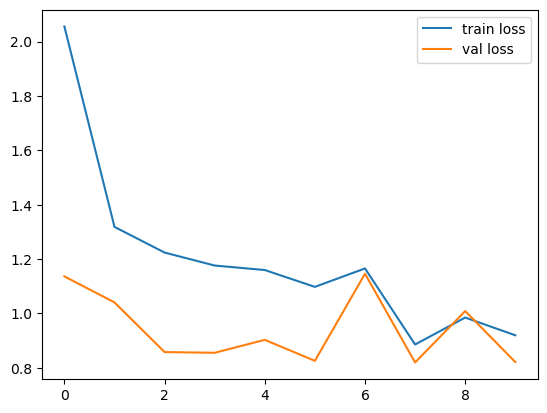

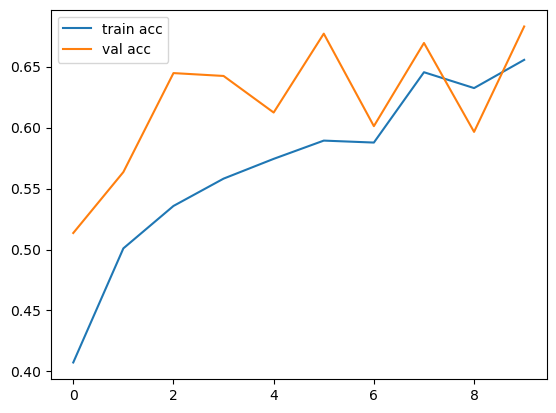

<Figure size 640x480 with 0 Axes>

In [22]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [23]:
# # ALREADY TAKES INTO ACCOUNT AUGMENTED IMAGES. DOESN'T GENERATE NEW. However, train/test split is missing. Next code cell fixes that.

# # Use the Image Data Generator to import the images from the dataset
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # No need for data augmentation for the train set since you already have augmented images
# train_datagen = ImageDataGenerator(rescale=1./255)

# test_datagen = ImageDataGenerator(rescale=1./255)

# # Make sure you provide the same target size as initialized for the image size
# training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Internships/Intel/Internship Projects/eAuto/Task 3/Datasets 3/augmented images',
#                                                  target_size=(224, 224),
#                                                  batch_size=32,
#                                                  class_mode='categorical')

# # Point the test_set to the directory containing the test images
# test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Internships/Intel/Internship Projects/eAuto/Task 3/Datasets 3/test',
#                                             target_size=(224, 224),
#                                             batch_size=32,
#                                             class_mode='categorical')

# # ...

# # fit the model
# r = model.fit(
#     training_set,
#     validation_data=test_set,
#     epochs=50,
#     steps_per_epoch=len(training_set),
#     validation_steps=len(test_set)
# )

# # ...


In [24]:
# # ...

# # Use the Image Data Generator to import the images from the dataset
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Define the validation split (e.g., 20% for validation)
# validation_split = 0.2

# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     validation_split=validation_split  # Add the validation_split parameter
# )

# test_datagen = ImageDataGenerator(rescale=1./255)

# # Make sure you provide the same target size as initialized for the image size
# training_set = train_datagen.flow_from_directory(
#     '/content/drive/MyDrive/Internships/Intel/Internship Projects/eAuto/Task 3/Datasets 3/augmented images',
#     target_size=(224, 224),
#     batch_size=32,
#     class_mode='categorical',
#     subset='training'  # Specify the subset as 'training' for the training set
# )

# validation_set = train_datagen.flow_from_directory(
#     '/content/drive/MyDrive/Internships/Intel/Internship Projects/eAuto/Task 3/Datasets 3/augmented images',
#     target_size=(224, 224),
#     batch_size=32,
#     class_mode='categorical',
#     subset='validation'  # Specify the subset as 'validation' for the validation set
# )

# test_set = test_datagen.flow_from_directory(
#     '/content/drive/MyDrive/Internships/Intel/Internship Projects/eAuto/Task 3/Datasets 3/test',
#     target_size=(224, 224),
#     batch_size=32,
#     class_mode='categorical'
# )

# # ...

# # fit the model
# r = model.fit(
#     training_set,
#     validation_data=validation_set,  # Use the validation_set for validation during training
#     epochs=50,
#     steps_per_epoch=len(training_set),
#     validation_steps=len(validation_set)  # Update to use the length of the validation set
# )

# # ...


In [25]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Define the validation split (e.g., 20% for validation)
# validation_split = 0.2

# datagen = ImageDataGenerator(
#     rescale=1./255,
#     validation_split=validation_split
# )

# # Specify the 'subset' parameter for training and validation sets
# training_set = datagen.flow_from_directory(
#     '/content/drive/MyDrive/Internships/Intel/Internship Projects/eAuto/Task 3/Datasets 3/augmented images',
#     target_size=(224, 224),
#     batch_size=32,
#     class_mode='categorical',
#     subset='training'
# )

# validation_set = datagen.flow_from_directory(
#     '/content/drive/MyDrive/Internships/Intel/Internship Projects/eAuto/Task 3/Datasets 3/augmented images',
#     target_size=(224, 224),
#     batch_size=32,
#     class_mode='categorical',
#     subset='validation'
# )

# test_set = datagen.flow_from_directory(
#     '/content/drive/MyDrive/Internships/Intel/Internship Projects/eAuto/Task 3/Datasets 3/test',
#     target_size=(224, 224),
#     batch_size=32,
#     class_mode='categorical'
# )

# # ...

# # fit the model
# r = model.fit(
#     training_set,
#     validation_data=validation_set,
#     epochs=50,
#     steps_per_epoch=len(training_set),
#     validation_steps=len(validation_set)
# )

# # ...


In [26]:
# # plot the loss
# plt.plot(r.history['loss'], label='train loss')
# plt.plot(r.history['val_loss'], label='val loss')
# plt.legend()
# plt.show()
# plt.savefig('LossVal_loss')

# # plot the accuracy
# plt.plot(r.history['accuracy'], label='train acc')
# plt.plot(r.history['val_accuracy'], label='val acc')
# plt.legend()
# plt.show()
# plt.savefig('AccVal_acc')

In [27]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

/home/kapil/anaconda3/envs/eauto/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
model.save('model_resnet50.keras')

In [29]:

y_pred = model.predict(test_set)


54/54 [==============================] - 87s 2s/step


In [30]:
y_pred

array([[4.6827518e-05, 8.5812193e-01, 7.4061804e-02, 6.7769408e-02],
       [3.9282510e-01, 1.6740519e-01, 2.2954971e-01, 2.1021999e-01],
       [1.2902795e-04, 3.6419544e-02, 9.5904464e-01, 4.4067539e-03],
       ...,
       [2.0969119e-05, 1.6455003e-03, 6.4682942e-03, 9.9186522e-01],
       [5.0066598e-03, 3.5276424e-02, 3.1807154e-01, 6.4164531e-01],
       [2.7781278e-02, 5.8250185e-02, 3.1062189e-01, 6.0334671e-01]],
      dtype=float32)

In [31]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [32]:
y_pred

array([1, 0, 2, ..., 3, 3, 3])